<a href="https://colab.research.google.com/github/Kenicki/Kenicki/blob/main/Logistic_regression_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [359]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [360]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [361]:
# shape of the dataset
df.shape

(891, 12)

In [362]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [363]:
#check for missing data
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

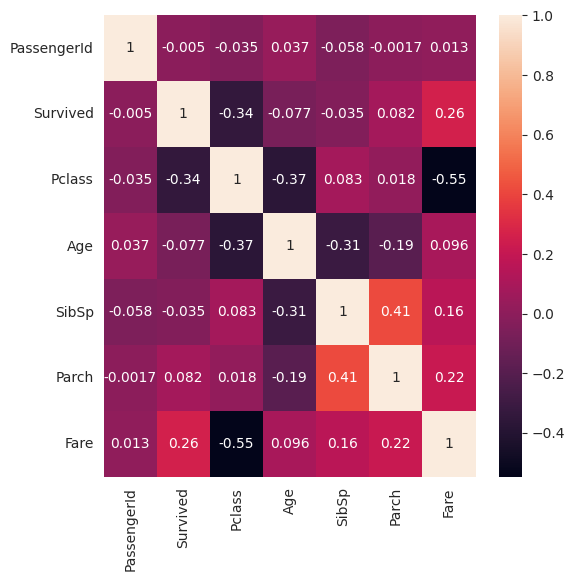

In [364]:
# heatmap to checkfor correlation between numerical features
df_num=df.select_dtypes(include=np.number)
plt.figure(figsize=(6,6))
sns.heatmap(df_num.corr(),annot=True)

In [365]:
correlation= abs(df_num.corr().Survived)
display(correlation)

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307


In the dataset, the following column have unique discrete values

Survival - 0 = No, 1 = Yes
Pclass - 1 = 1st, 2 = 2nd, 3 = 3rd
Embarked - C = Cherbourg, Q = Queenstown, S = Southampton

In [366]:
#verify the unique values for Survived column
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [367]:
#verify the unique values for Pclass column
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [368]:
#verify the unique values for Embarked column
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [369]:
#verify the unique values for Embarked column
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


Conclusion: the number againsts each unique value represent number of records belonging to the specific category

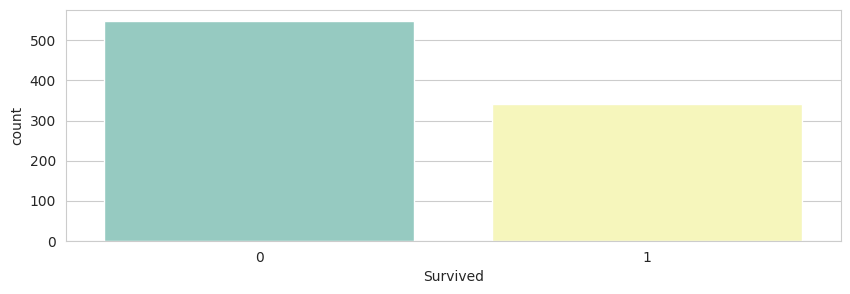

In [370]:
#visualize survival vs demise
plt.figure(figsize=(10, 3))
sns.countplot(x = "Survived",data=df, palette="Set3")
plt.show()

<Figure size 1000x300 with 0 Axes>

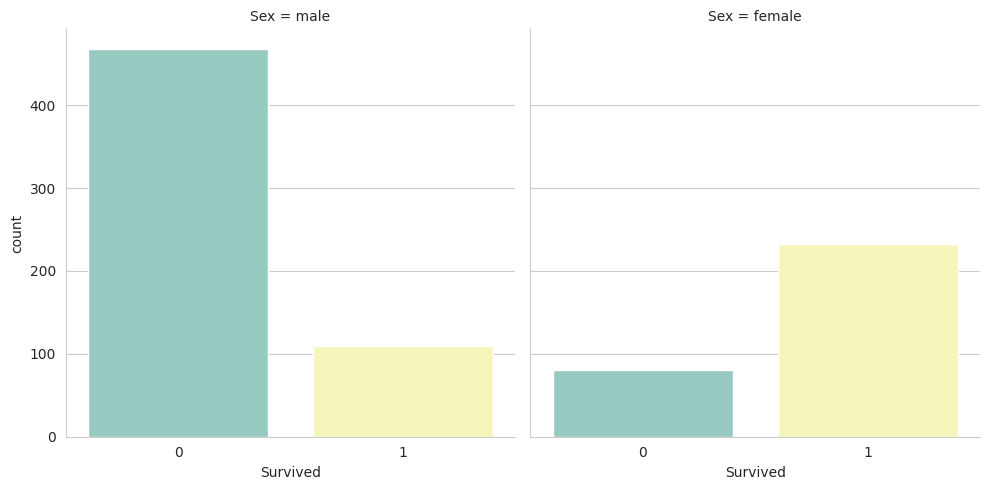

In [371]:
#visualize survival based on sex
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Sex', kind='count', data=df,palette="Set3");
plt.show()

<Figure size 1000x300 with 0 Axes>

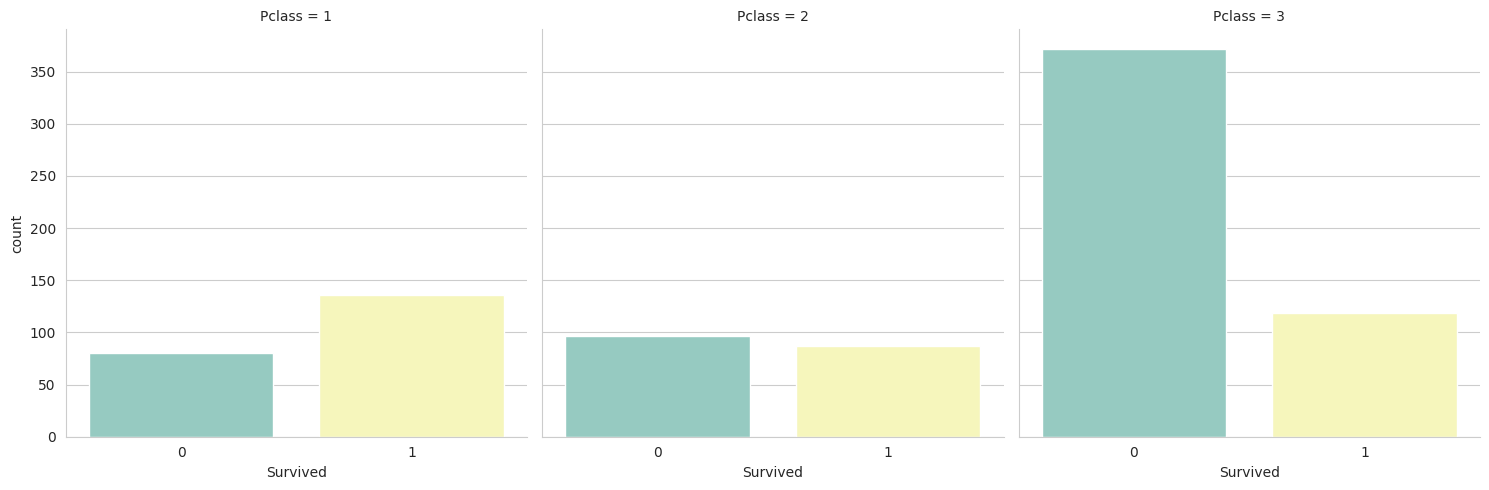

In [372]:
#survival based on Pclass- Passenger Class
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Pclass', kind='count', data=df,palette="Set3");
plt.show()

<Figure size 1000x300 with 0 Axes>

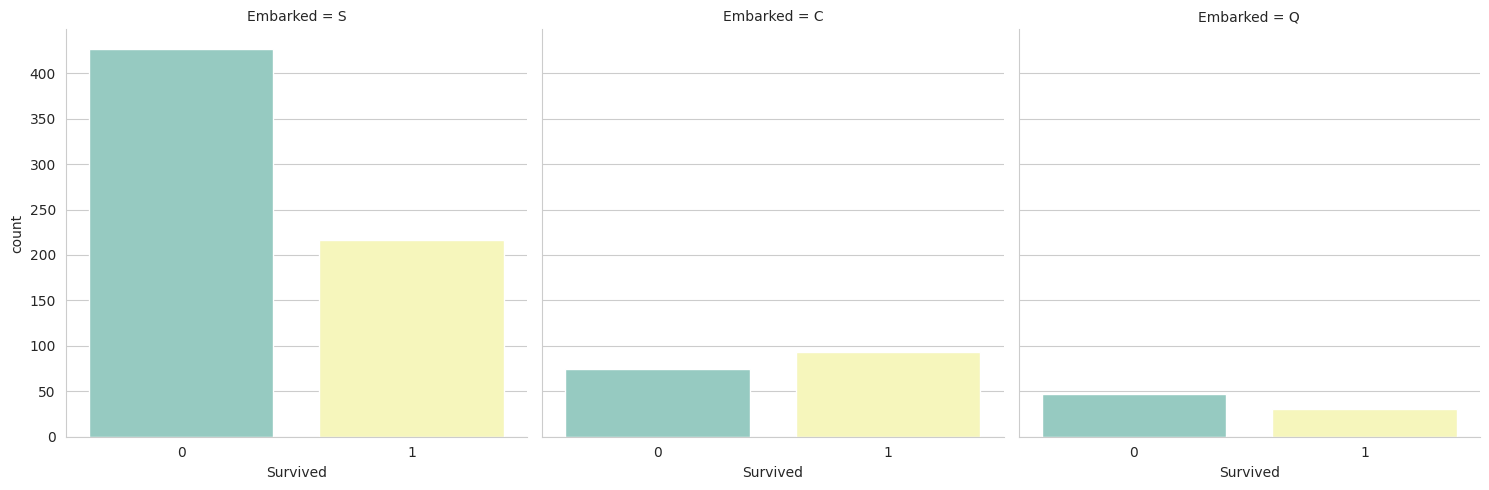

In [373]:
# survival based on Embarked
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', kind='count', data=df,palette="Set3");
plt.show()

Majority of people boarded from Southampton port could not survive. Already we have seen people in 3rd Class could not survive. So we have check relation between Pclass and Embarked

<Figure size 1000x300 with 0 Axes>

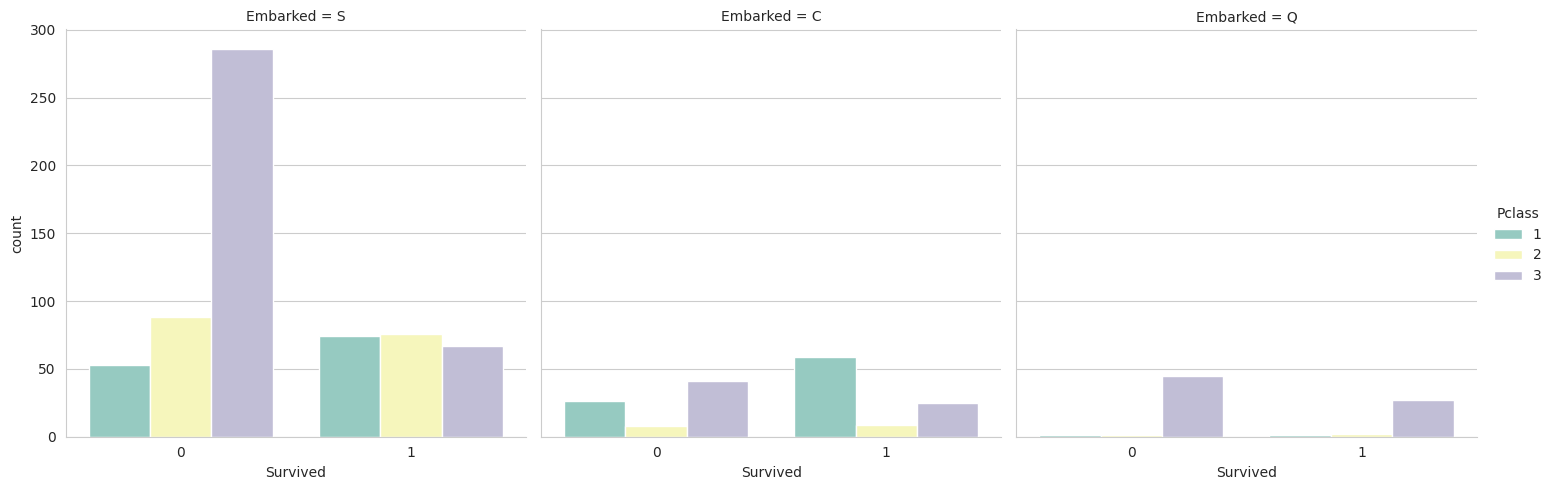

In [374]:
#survival based on Embarked and Pclass
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', hue = 'Pclass', kind='count', data=df,palette="Set3");
plt.show()

Embarked S - Majority of people died belong to PClass 3. Embarked C - Here Pclass 2 has less death compared to other 2 class, still Pclass 3 has majority of death. But when compared to Embarked C infact it is much much less. Embarked Q - Here Pclass 3 only have death rate.

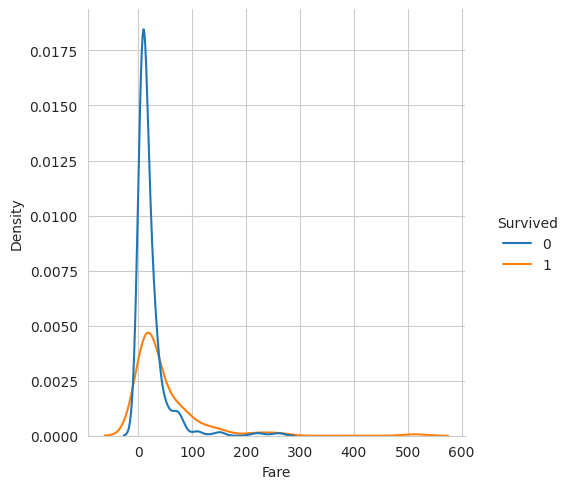

In [375]:
#survival based on Fare
sns.displot(data=df, x="Fare",hue='Survived',kind ='kde')

The Maximum of people who could not survive were those who bought the ticket with low fare.

In [376]:
#Survival based on Sex
pd.crosstab(df.Sex,df.Survived,normalize = "index" ).style.background_gradient(cmap='crest')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


74% of total females could survived but only 18% of males could survive

In [377]:
#Survival based on Pclass
pd.crosstab(df.Pclass,df.Survived,normalize = "index" ).style.background_gradient(cmap='Spectral_r')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Statistical analysis of survival based on Pclass shows, 62% of PClass 1 could survive, and 47% of Pclass2 could survive and 24% of PClass3 could survive.

In [378]:
#Survival based on Embarked
pd.crosstab(df.Embarked,df.Survived,normalize = "index" ).style.background_gradient(cmap='crest')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


Statistical analysis of survival based on Embarked shows, 55% of Embarked C could survive, and 38.96% of Embarked Q could survive and 33% of Embarked s could survive

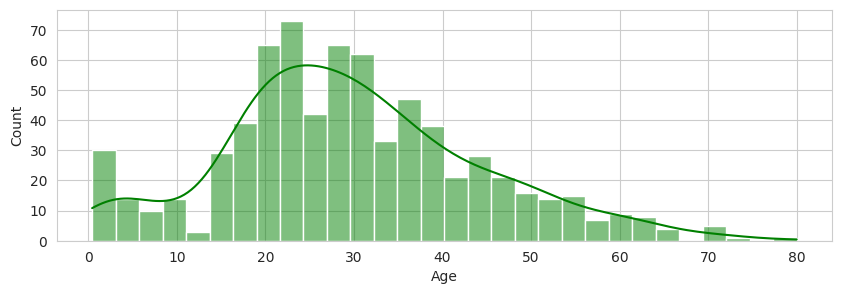

In [379]:
#check distribution of age using a Histogram
plt.figure(figsize=(10, 3))
sns.histplot(df['Age'].dropna(),kde=True,color='green',bins=30)
plt.show()

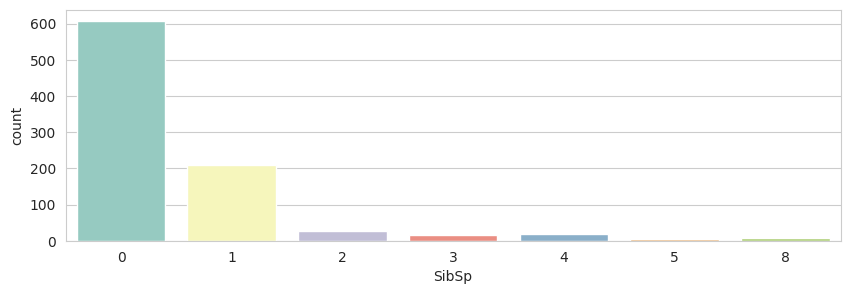

In [380]:
#visualize SibSp(Sibling/Spouses)
plt.figure(figsize=(10, 3))
sns.countplot(x = "SibSp",data=df, palette="Set3")
plt.show()

we conclude most of the people who travelled did not have sibling or spouse

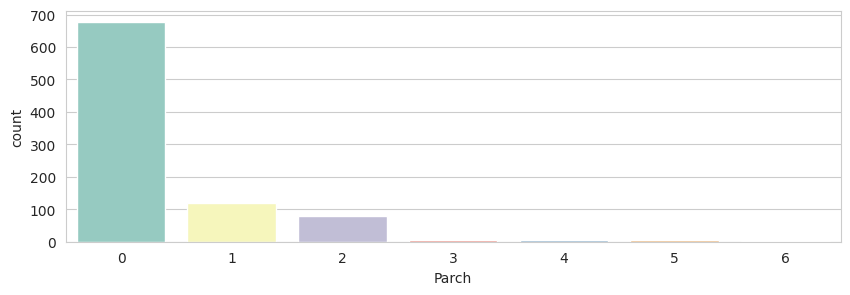

In [381]:
#visualize Parch
plt.figure(figsize=(10, 3))
sns.countplot(x = "Parch",data=df, palette="Set3")
plt.show()

we conclude most of the people who travelled did not have children accompanying them

## Solve for missing values

In [382]:
#check for missing data
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
Age,177
Cabin,687
Embarked,2


We will use imputing function to fill missing age data, by finding dependency of age over the Pclass variable, as we have already seen 3rd class survival rate is very less. For this first we can visualise this distribution using a boxplot with age and Pclass.

Boxplot, box indicates the interquartile Range(IQR) with median as central line. Maximum value that is the line end at top is equal to Q3+1.5* IQR and minimum line at bottom is equal to Q1-1.5* IQR. If there is any circle outside the extreme lines, it indicates there is outlier in the data.

Text(0.5, 1.0, 'Age over Pclass')

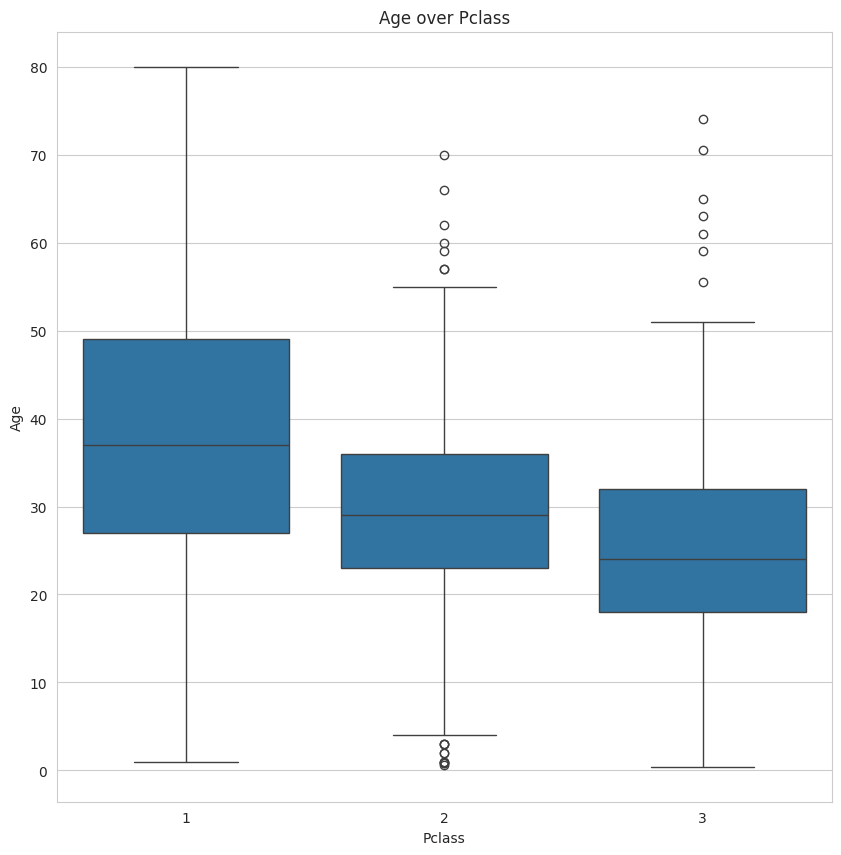

In [383]:
#boxplots to visualize Age Distribution by Passenger Class
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass',y='Age',data=df)
plt.title('Age over Pclass')

Boxplot 1 it is very clear that older people are in Pclass 1.
The median of Pclass1 = 37, Pclass2 = 29 and PClass3 = 24.


In [384]:
# create an if else statement to define df Age which will return age, whose value will be median of that particular Pclass.

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [385]:
# replace the null value of Age column using function impute_df_age().

def impute_df_age(df):
  df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)
  return df

df = impute_df_age(df)

# Check for missing data again
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Cabin       687
Embarked      2
dtype: int64


In [386]:
#solve missing data for Cabin (687 entries)
#check for missing data
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
Cabin,687
Embarked,2


Best way is to drop this column

In [387]:
df.drop('Cabin',axis=1,inplace=True)

In [388]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [389]:
#solve missing data for Embarked
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
Embarked,2


In [390]:
# drop rows with missing values
df.dropna(inplace=True)

we have 2 rows with missing values, best way is to drop them

In [391]:
#check for nulls
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [392]:
#check info about the dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


We have 4 categorical variables in our dataset i.e Name, Sex, Ticket and Embarked.
Features Name and Ticket will have no significant meaning for determining target, so we can drop those two.
Where as Sex and Embarked feautres will have to be encoded before builiding model.

In [393]:
#drop Name and Ticket columns
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [394]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [395]:
# One-hot encoding if categorical columns exist
df = pd.get_dummies(df, drop_first=True)

In [396]:
# Select features (X) and target (y)
x = df.drop('Survived', axis=1)
y = df['Survived']
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [397]:
#view y
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [398]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [399]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [400]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict
y_pred = model.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.797752808988764
Confusion Matrix:
 [[88 21]
 [15 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.78      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



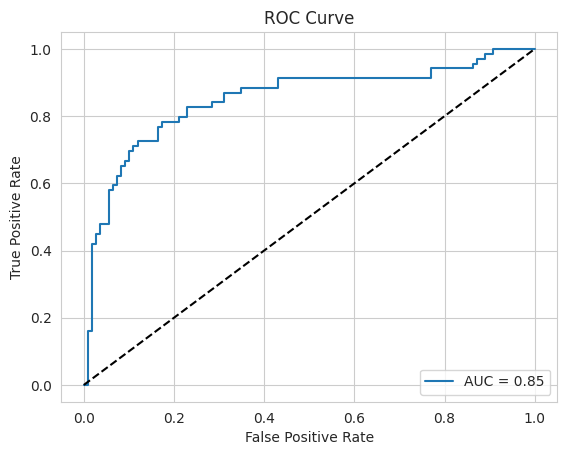

In [401]:
#visualize ROC curve to choose best threshhold for classification
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [402]:
# Interpret the coefficients
# Get column names from the DataFrame after one-hot encoding but before splitting
feature_names = df.drop('Survived', axis=1).columns
coefficients = pd.DataFrame(model.coef_[0], index=feature_names, columns=['Coefficient'])
display(coefficients)

,Coefficient
PassengerId,0.000158
Pclass,-1.213401
Age,-0.047792
SibSp,-0.394708
Parch,-0.056059
Fare,0.001600
Sex_male,-2.637429
Embarked_Q,-0.107899
Embarked_S,-0.441591


Conclusion:

The logistic regression model achieves 80% accuracy.

From the Receiver Operating Characteristic (ROC) Curve we see that if you randomly select one survivor and one non-survivor, there's an 85% chance the model will assign a higher predicted probability to the survivor.

Interpretation of coefficient table:

Pclass -0.43:
As passenger class increases (1 → 2 → 3), survival odds decrease. Lower-class passengers had a significantly lower chance of survival.

Age -0.009:
Older age slightly reduces the odds of survival. Young passengers had a survival advantage (children prioritized).

SibSp -0.14:
More siblings/spouses aboard slightly lowers survival odds — possibly due to group dynamics or crowding.

Parch -0.23:
Similar to SibSp: more parents/children aboard reduces odds, possibly due to being part of larger groups.

Fare 0.012:
Higher ticket fare increases survival odds — proxy for higher socio-economic status (more likely in better cabins or locations).

Sex_male -2.67:
Strong negative impact. Being male sharply reduces survival odds (by about 93% compared to females — a dominant predictor).

Embarked_Q  0.096:
Small positive effect versus the baseline port (Cherbourg). Not a major driver.

Embarked_S  0.132:
Slight positive effect compared to Cherbourg — counter to expectation (this may vary with sample size).
